In [1]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 16s 4us/step


In [13]:
print('Train: X=%s, y=%s' % (train_X.shape, train_Y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_Y.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


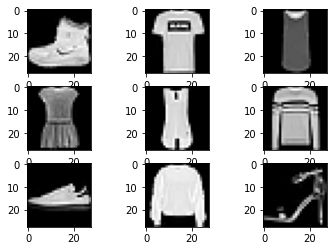

In [14]:
for i in range(9):
	pyplot.subplot(330 + 1 + i)
    
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [15]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [16]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [17]:
train_X = train_X / 255
test_X = test_X / 255

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [18]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

In [19]:
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [20]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 102s 107ms/step - loss: 0.6506 - accuracy: 0.7684
Epoch 2/5
938/938 [==============================] - 99s 106ms/step - loss: 0.3308 - accuracy: 0.8803
Epoch 3/5
938/938 [==============================] - 98s 104ms/step - loss: 0.2800 - accuracy: 0.8997
Epoch 4/5
938/938 [==============================] - 98s 104ms/step - loss: 0.2508 - accuracy: 0.9083
Epoch 5/5
938/938 [==============================] - 100s 106ms/step - loss: 0.2336 - accuracy: 0.9160


In [21]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)

313/313 [==============================] - 6s 19ms/step - loss: 0.2876 - accuracy: 0.8965


In [22]:
print('Test loss', test_loss)
print('Test accuracy', test_acc)

Test loss 0.28756439685821533
Test accuracy 0.8964999914169312


In [23]:
print('Test loss', test_loss)
print('Test accuracy', test_acc)

Test loss 0.28756439685821533
Test accuracy 0.8964999914169312


In [28]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[6])))

4


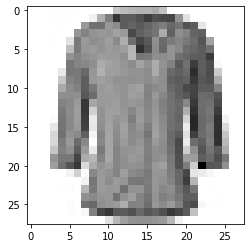

In [29]:
plt.imshow(test_X[4].reshape(28, 28), cmap = plt.cm.binary)
plt.show()